In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

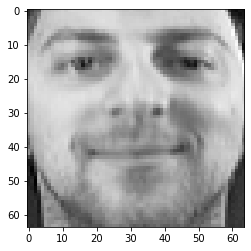

In [ ]:
data = fetch_olivetti_faces(shuffle=True, random_state=0)
print(data.shape)
sample_image = 5
plt.imshow(data['images'][sample_image], cmap='gray')
plt.show()

The data from sklearn gives us 400 images with size 64x64. When flattened, each image will have 4096 features, which gives us a dataset of size (400, 4096). This flattened dataset is what we will feed to the PCA algorithm. 

The image above shows the 5th image in the dataset as a reference. We will use this image as a reference for later on.

In [ ]:
mean_images = np.mean(data['data'], axis=1) # get the mean of each image. each row is an image.
mean_images = mean_images[:, np.newaxis] # transform the row vector into a column for easy subtraction
images = data['data'] - mean_images

In cell 3, we are mean centering the dataset as a pre-processing step for PCA.

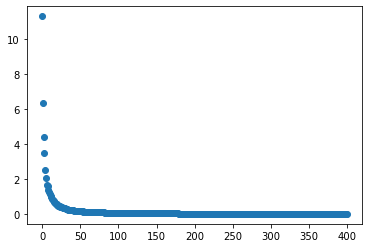

In [ ]:
pca = PCA()
pca.fit(images) 
eigenvalues = pca.explained_variance_ #explained_variance_ contains the eigenvalues
index = range(len(eigenvalues))
plt.scatter(index, eigenvalues)
plt.show()

Plotting the eigenvalues will give us an idea of how many principal components to use. Generally speaking, eigenvalues close to 0 do not contribute much to the variance of the data.

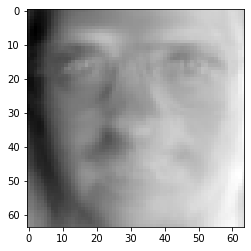

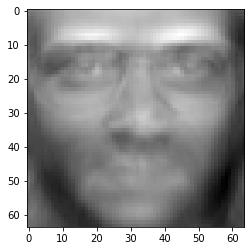

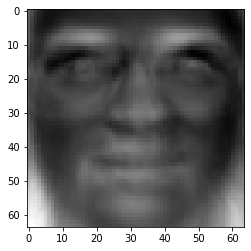

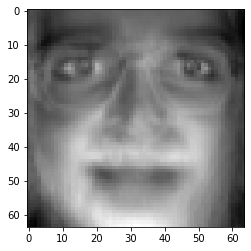

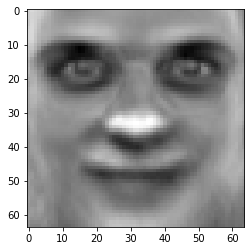

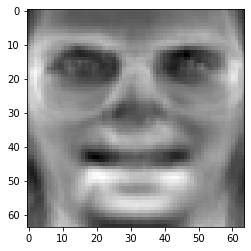

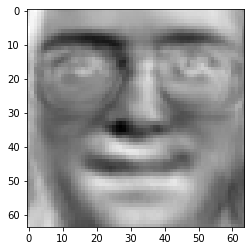

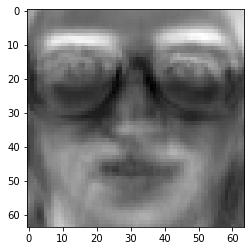

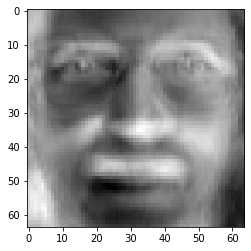

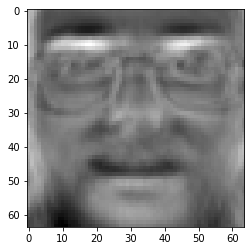

In [ ]:
import numpy as np
principal_components = pca.components_
num_images = 10
for i in range(num_images):
    image = principal_components[i]
    image = np.reshape(image, (64,64))
    plt.imshow(image, cmap='gray')
    plt.show()



In here, we are showing the first 10 principal components, or the 'eigenfaces'. You can imagine the 'eigenfaces' as the faces with which you can use to recreate the faces within the dataset with the least reconstruction error.

In [ ]:
num_principal_components = 10
recons_components = principal_components[:num_principal_components].T
print(f"Shape of principal components to use: {recons_components.shape}")
projection = images[sample_image] @ recons_components
print(f"Using the first {num_principal_components} principal components to reduce the dimensionality of the image.")
print(f"Result: {projection}")

Shape of principal components to use: (4096, 10)
Using the first 10 principal components to reduce the dimensionality of the image.
Result: [-1.6046772   2.6395302  -5.7106767  -1.1583445   0.43388915  4.0886927
  0.72605795 -2.724918   -0.69750226 -0.45392132]


In here, we extract the first 10 principal components, and then transpose it to create a matrix (4096 x k) where k = number of principal components to use. We get the values of the projections to the reduced space by multiplying the image with this matrix.

As a result, we can reduce a (64x64) image into a feature space with 10 elements. If we use this on the whole dataset, we will be left with a matrix of (400,10) which we can use for subsequent analysis.

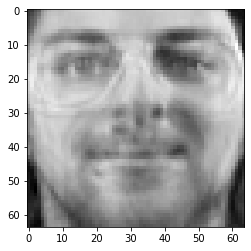

In [ ]:
recons = projection @ recons_components.T
recons_image = np.reshape(recons, (64,64))
plt.imshow(recons_image, cmap='gray')
plt.show()

We can map the projection back to the image by multiplying the projection with the transpose of the recons_component matrix. To visualize, the dimensions of the resulting matrix multiplication is (1 x 10) @ (10 x 4096) = (1 x 4096)

We can then reshape this vector back to (64 x 64) to get the desired image.